In [4]:
import matplotlib.pyplot as plt 
#importing the plotting library

import numpy as np              
#importing numpy, which can build arrays and do typical calculations

import metpy.calc as mpcalc
#importing metpy calculations (relevant meteorological functions)

from metpy.plots import SkewT
#importing metpy plotting pre-builts (specifically just the SkewT for now)

from metpy.units import units
#importing metpy unit conversions

p_dum = [100,150,200,250,300,400,500,700,829.5] * units.hPa
#this code forms a 1d array (list) of pressure levels found from a random sonde launch
#the * units.hPa part sets the units to hPa. Metpy requires that all values have units.

p = np.flip(p_dum)
#this code uses numpy to flip the array to go from highest to lowest pressure instead.

print("P=")  #prints 'P'
print(p)     #print p values
print(' ')   #print a blank line so the subsequent output is easier to read

t_dum = [220.6069629,224.170451,226.1850985,225.8928628,227.5593779,234.4137627,245.1965028,260.0336329,269.45] 
#setting temperature values with units of Kelvins

t = np.flip(t_dum)
#flipping t array to match corresponding P levels
#the reason for the flips here is that the prebuilt sounding plot require P high to low.

t=np.subtract(t,273.15) * units.degC
#this uses numpy to subtract T values and 273.15 to get C units.
#the units.degC part tells metpy that the units are now C
#there are other ways to do this directly using metpy unit conversions

print("T=")  #prints 'T='
print(t)     #prints the newly flipped T array in C units
print(' ')   #print a blank line so the subsequent output is easier to read


hum=[1.16475575,1.144711786,1.16702103,2.10878312,2.049143857,63.77875237,62.95986556,48.67866154,46.]
hum=np.flip(hum)
#the above code takes the RH values, and flips them to match P and T order

hum=np.multiply(hum,.01)  #express RH in ratio form
print("hum=")
print(hum)
print(' ')   

td=mpcalc.dewpoint_from_relative_humidity(t,hum)
#instead of explicitly calculating dewpoint from T and RH, we have metpy do it for us!
#a good conversion from T and RH to Td is rather cumbersome to code
#it was necessary to put RH in ratio form since this function required that


print("Td =")
print(td)      # see what you have for Td
print(' ')    #print a blank line so the subsequent output is easier to read


#Winds are a bit more complex here since metpy requires u and v components 
#but this data gives wind direction and speed instead
#Metpy can do this directly, but I want you to see how it is done

wdir2=[0.417082059,315.9018695,338.9978076,353.5234665,340.9182369,295.5171942,339.0390965,282.640272,57.]
wdir=np.flip(wdir2)  #again just lining up winds with P, T, and Td

print('Wind Direction in deg')
print(wdir)
print('   ')
      
wspd2=[16.53233387,14.08197915,16.71400891,21.44678588,22.92168978,9.809780177,15.54009004,6.06831332,2.6]
wspd=np.flip(wspd2)  #again just lining up winds with P, T, and Td

wspdk=np.multiply(wspd,1.944)
#this code converts the m/s winds to knots

print('Wind Speed in knots')
print(wspdk)   #the output won't show knots yet since we didn't tell metpy that yet
print('   ')

dum=np.multiply((np.pi/180),wdir)
dumsin=np.sin(dum)
u = np.multiply(-wspdk,dumsin) * units.knots  
#this packet of code converts wind direction to radians, take the sine of that
#and then finds the u components (positive if west to east) and tells metpy 
#the units are knots

print('U=')
print(u)   #now metpy knows the units are knots
print('  ')

dumcos=np.cos(dum)
v = np.multiply(-wspdk,dumcos) * units.knots
#this code uses the cosine function to get the v component of wind
#the v component is defined as positive from south to north.

print('V=')
print(v)
print('  ')

#run this cell by going to Cell -->Run Cells

#the first thing you'll want to check is that the variables that metpy will use
#have units associated with them

#Clearly P, T, Td, u, and v all have units attached, so this is good!

#hum, wind direction, and wind speed don't have units attached. They were used
#to simply create variables we need (u, v, and Td)

#the next thing is to check is if the u and v components make sense. For a 57 deg
#surface wind (from the NE), does it make sense that u and v are both negative?

#Does the square root of (u^2+v^2)= the wind speed at the surface?

P=
[829.5 700.0 500.0 400.0 300.0 250.0 200.0 150.0 100.0] hectopascal
 
T=
[-3.6999999999999886 -13.11636709999999 -27.953497199999987 -38.73623729999997 -45.59062209999999 -47.25713719999999 -46.96490149999997 -48.97954899999996 -52.543037099999964] degree_Celsius
 
hum=
[0.46       0.48678662 0.62959866 0.63778752 0.02049144 0.02108783
 0.01167021 0.01144712 0.01164756]
 
Td =
[-13.647642910998337 -21.667642991069037 -32.83629867512338 -43.027098996533056 -75.61305624191381 -76.6283769465772 -80.16972420022219 -81.68109058399222 -84.05226449176646] degree_Celsius
 
Wind Direction in deg
[ 57.         282.640272   339.0390965  295.5171942  340.9182369
 353.5234665  338.9978076  315.9018695    0.41708206]
   
Wind Speed in knots
[ 5.0544     11.79680109 30.20993504 19.07021266 44.55976493 41.69255175
 32.49203332 27.37536747 32.13885704]
   
U=
[-4.2389765186233515 11.510884297771774 10.807025006868304 17.21002878031259 14.567349613462502 4.702764297409165 11.645264064806293 19.050227

Now that the data looks good, we can plot this thing!

We will use metpy's SkewT plot as well as the matplotlib (we imported this as 'plt') to do this.

Although there is quite a bit of magic going on behind the scenes here, it really would be quite an effort to create all the components that metpy will use here.

PROF = parcel temps
[-3.6999999999999886 -16.27635258753054 -37.04750134424154 -51.10280967376329 -68.46110191677101 -78.83028935748803 -90.82682027638643 -105.21252984365174 -123.5829264186383] degree_Celsius
   


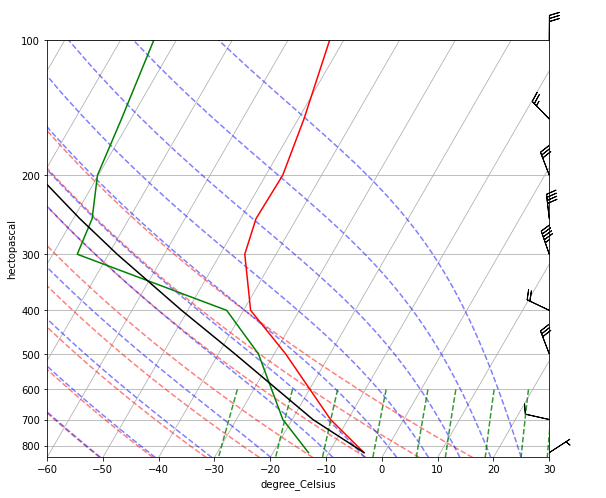

In [5]:
fig = plt.figure(figsize=(9, 9)) #setting figure size
skew = SkewT(fig)                #setting figure type. We will call to this below. 


#Calculate parcel profile
prof = mpcalc.parcel_profile(p, t[0], td[0]).to('degC')

#the above is making a lifted parcel profile to ease your analysis 
#it is initializing the parcel with the T and Td at the surface
#here t[0] means the first number in the t array. 
#recall that we arranged things to go from the surface (highest P) up
#the whole p array is in there since we want the parcel path at all levels

print("PROF = parcel temps")
print(prof)
print('   ')

#so now you see that prof is just an array of temps of the parcel. 
#Of course, you know this depends on the LCL and lapse rates it follows
#this is found by metpy since it knows the intial T and Td and the change in P
#as it goes up

#now we call to the skew function we set up at the top of this chunk of code

skew.plot(p, t, 'r')     #set environmental Ts to red
skew.plot(p, td, 'g')    #set environments Tds to green
skew.plot(p, prof, 'k')  #set parcel profile to black

#more colors ==> https://matplotlib.org/2.0.2/api/colors_api.html

skew.plot_barbs(p[::1], u[::1], v[::1])

#you can imagine that drawing up your own wind station models might be intense!!
#here we are showing 'slicing' of the 1D arrays using the [::x] method
#As we have it [::1], we are using every number, but if you set p[::2],u[::2] etc. it 
#would use every other data point instead. And p[::-1] would reverse the array
#and use every point!

#try changing the slicing and see what happens when you run the cell. 
#since we only have 9 data points here, why not use all? But, our high rez sounding
#file has 3300 points so you wouldn't want that many wind barbs!!

skew.ax.set_xlim(-60, 30)
skew.ax.set_ylim(850, 100)

#simply setting axis limits. Try changing these and rerunning

# Add the relevant special lines
skew.plot_dry_adiabats()       #change color with (color='g') for example
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

#skew.ax.fill_betweenx(p, t, prof, where=t>=prof, facecolor='blue', alpha=0.4)

#you can use above to fill stable areas blue (e.g. to see CINH in low levels)
#**note this is a winter sounding and is all stable
#in practice, one would limit this to below the LFC to see CINH explicitly

#skew.ax.fill_betweenx(p, t, prof, where=t<=prof, facecolor='red', alpha=0.4)

#you can use above to fill unstable areas red (e.g. to see CAPE above the LFC)
#there are no unstable areas on this sounding

plt.show()   #show the graph we have built

Cool! So now we know a bit about how this plotting setup works and some basic array manipulation and math in Python.

Let's learn how to read in data from a 'flat file' (a 2D file like a csv or text) and you can make a new plot. 

Download the sounding csv file from Canvas to Jupyter. Go to File-->Open-->Upload to save the csv to your Jupyter directory. 

## Reading in a data from flat files


### Next we will use numpy to form an array from the text in the file, using a comma as a delimiter and skipping the header


In [6]:
data_raw=np.genfromtxt('/content/HiRes_092821.csv',delimiter=',',skip_header=1)
print(data_raw.shape)

(3922, 8)


In [27]:
#let's sample every 50th row. We will use a striding technique--> start:stop:step
#https://numpy.org/doc/stable/reference/arrays.indexing.html#basic-slicing-and-indexing
data=data_raw[0::50,:]
print(data.shape)

(79, 8)


### Now you have a 2D numpy array 



## Forming 1D arrays

### If you want to rip out the first column of data [Height (m asl)] you can use hgt=data[:,0] for example. This is telling numpy you want all the values in the first column (numbering starts at 0, not 1)

### Now that we've seen some ways to process data, we will now use some of metpy's built in functions to our advantage.

In [28]:
hgt=data[:,0]   #just grabs the column of heights

In [29]:
print,hgt       #check to see if it matches the excel sheet

(<function print>,
 array([ 1594.562056,  1800.254759,  1958.895459,  2095.213317,
         2240.345215,  2394.810761,  2603.2485  ,  2857.957824,
         3115.71135 ,  3315.991047,  3512.559758,  3721.713085,
         3912.25438 ,  4072.987912,  4221.277772,  4384.370102,
         4563.849587,  4746.049075,  4929.80666 ,  5111.362895,
         5282.331847,  5453.120036,  5600.131767,  5776.71394 ,
         5979.429747,  6193.792816,  6390.244657,  6576.285068,
         6764.898119,  6949.966446,  7136.122457,  7317.759835,
         7504.926247,  7685.413372,  7860.929473,  8036.931962,
         8211.45311 ,  8386.068749,  8545.671627,  8707.350092,
         8859.376792,  9011.793098,  9166.7414  ,  9338.082461,
         9527.770631,  9740.97911 ,  9940.126046, 10135.19519 ,
        10323.41141 , 10509.15418 , 10690.95061 , 10875.40897 ,
        11049.04251 , 11262.11872 , 11456.1918  , 11654.5371  ,
        11866.99983 , 12053.11882 , 12241.50941 , 12451.9035  ,
        12648.70125 ,

### Use this technique to get 1D arrays for rh (col 1), p (4), t(5), wdir(6), and wspd(7)

### Give proper units to rh (percent), p (hPa), t (kelvin), & wdir (deg) 

### proper syntax is units.hPa for example

### To assign a compound unit (like m/s) to wspd, use wspd=data[:,7]*units('m/s') 

In [10]:
#run your code here and add more cells as needed

In [30]:
rh=data[:,1]*units.percent

In [31]:
p=data[:,4]*units.hPa
print(p)

[829.9199 810.6465 795.8908 783.430969 770.30365 756.4897 738.1668 716.177063 694.413635 677.821838 661.851746 645.1154 630.1453 617.757751 606.4922 594.3016 581.0662 567.871338 554.802856 542.1185 530.4034 518.8693 509.084229 497.559143 484.578827 471.141052 459.065643 447.882751 436.786072 426.124634 415.5977 405.523071 395.340668 385.743927 376.572632 367.541321 358.754974 350.10614 342.4038 334.657 327.508728 320.472229 313.424561 305.7498 297.478027 288.3144 279.975677 271.962952 264.416931 257.094879 250.08194 243.129257 236.690384 229.0124 222.147568 215.349228 208.281754 202.304764 196.458862 190.067215 184.295731 178.081375 172.587967 167.104721 162.116089 157.37117 152.55864 147.7046 142.8901 138.100739 133.6474 129.000427 124.583664 120.2986 116.457962 112.74276 109.029266 105.274178 101.579247] hectopascal


In [32]:
t=data[:,5]*units.kelvin

In [33]:
wdir=data[:,6]*units.deg

In [34]:
wspd=data[:,7]*units('m/s')
 #a student tells me data[:,7]*units.mps works too!

In [35]:
print(wspd)

[2.467476939 5.58221154 5.151118871 4.800820203 5.263292473 5.100056757 5.077648683 4.341110256 5.560592067 4.832338616 4.619620593 4.789134702 5.336031703 5.745207315 5.279098767 4.323792903 3.449963029 3.466999191 2.991327863 1.692468852 1.542758888 2.725221416 2.069153417 1.548783219 5.073747325 7.418034542 7.436109569 4.97409422 4.651781697 6.25084613 7.206865133 6.862000653 5.927750907 5.111215913 5.529815483 6.23750748 5.761617781 7.132413143 8.388299892 9.070482527 9.730836009 10.75418517 11.11615208 9.806108018 10.3597989 10.34483839 11.94130977 11.71022122 11.56641279 11.92086422 12.59307081 14.84904395 15.03325982 15.27882836 14.22455197 12.49909775 9.016139341 11.25891635 8.653940284 10.72841751 11.97195482 10.07215641 11.43831236 9.00009312 11.17753318 10.85691017 8.701236942 6.949654776 4.722884041 8.974856681 11.71179349 13.49319508 12.2294743 10.19174171 10.70238856 12.49795553 13.10368635 11.04118952 10.70280821] meter / second


### We had to tell MetPy what the units were for the raw data. Metpy has built in capabilities to change units as well.

### For example, to change t to degC use t=t.to('degC')

### Use this method to change t to degC and wspd to knots (called 'knot')

In [36]:
t=t.to('degC')
print(t)

[25.557825000000037 22.41700000000003 20.813654000000042 19.521142999999995 18.188867000000016 16.712427000000048 14.705399999999997 12.237238000000048 9.72274200000004 7.716577000000029 5.815899999999999 3.8126000000000317 2.132135000000005 1.5816280000000233 0.5104310000000396 -0.8214479999999753 -2.43629999999996 -4.104955999999959 -5.318151999999998 -6.811345999999958 -7.719599999999957 -9.407842999999957 -10.401499999999999 -11.50311899999997 -12.840199999999982 -14.699072000000001 -16.181646999999998 -16.424718999999982 -17.806234999999987 -19.15588999999997 -20.56348299999999 -21.82706299999998 -22.85655799999998 -23.88409999999999 -25.181142999999963 -26.71292699999998 -28.267476999999985 -29.75996999999998 -31.149160999999964 -32.567830999999984 -33.810689999999965 -35.114461999999975 -36.403722999999985 -38.061773999999986 -39.68576699999997 -41.61354699999998 -43.44998799999999 -45.213599999999985 -46.90152599999999 -48.571248999999966 -50.212575999999984 -51.767919999999975

In [18]:
#run your code here and add more cells as needed

In [37]:
wspd=wspd.to('knot')

### Instead of having you use my trig. functions, let's use a built-in function to get the u and v components directly

In [38]:
u,v=mpcalc.wind_components(wspd,wdir) #this works only if units are assigned previously!

#### print them to see if they make sense

In [39]:
print(u)

[-4.590240926926862 -9.191895255110008 -8.41072914489989 -7.819488964159364 -7.486026322229359 -6.330184664142154 -5.686161952162752 -3.3919263560925614 -7.542360804063909 -5.93330764141136 -5.005161622390048 -4.999056807650538 -3.8537508481496774 -3.849685711775144 -4.217770130232994 -2.287932637480453 -3.525050442386069 -1.812781409153107 0.6735615237335423 1.0774863998359527 0.7928716914886331 -2.1346408502187173 -1.6785860906558288 -1.758160533365127 -4.762502008061296 -7.708513199693922 -8.185598092082342 -6.851910917341394 -4.629353478665458 -6.3129509162368125 -5.42808954670678 -5.043741569879203 -6.561347514740158 -2.196526778474123 -0.4006395782729678 -1.5767835141455109 -3.2285658919505953 -5.403178148808293 -4.8531883688446245 -3.98148555183407 -3.3666959805742804 -4.492343470583607 -3.8053856100277152 -0.41381811231180404 1.8076780502694434 1.3420452145119894 -1.2283973497961564 -1.6317545972347807 -1.9653334528239277 -4.179584904225397 -6.841223399871258 -8.245490045500762

In [40]:
print(v)

[1.3910640718867164 5.766472287730979 5.433165239806283 5.093398722743043 6.973752420461601 7.62958397276137 8.067689221092433 7.726717303244908 7.742459588857046 7.282185348191874 7.455574897113374 7.853223163900514 9.629933265791935 10.483293585877922 9.354884709033584 8.087379566737207 5.7050000523892495 6.490923371414143 5.7755323639154135 3.108446627702787 2.892171490994166 4.848280679985869 3.655097466135284 2.4438793234247647 8.63649094889871 12.186097229512802 11.913547735370214 6.8218970839634 7.767432216394482 10.381979617500882 12.914667166773599 12.348302702555548 9.472044533605116 9.68956243411243 10.74163247411518 12.021779586753299 10.724243366303343 12.768106202610664 15.566552003087036 17.176185722438063 18.61320389247165 20.41605860850449 21.27034961176463 19.057056626185258 20.05654059833435 20.06392354299197 23.17952263006782 22.704287538101877 22.39724523261519 22.79225410962176 23.50356781655593 27.661449712377323 27.207885885529983 27.58020342627033 25.4346057506

### Follow previous code to get dew point from t and rh. 

### There is no need to change rh to ratio form since you explicitly assigned percent units to rh. 

In [41]:
td=mpcalc.dewpoint_from_relative_humidity(t,rh)
print(td)

[1.7027593350194172 0.5907793358924066 0.24866836417111698 0.2302877783094161 -0.010868532498047001 -0.3185028234843317 -0.4581595305217174 -0.8471151854053874 -1.380001160044121 -1.6141617400423207 -1.9874457650417054 -2.2245021264683014 -3.1295472953877153 -7.576928111278642 -8.074811056606428 -7.851491776900623 -8.26895316996234 -8.931942529902507 -11.32943370263344 -12.76283612788695 -13.76516117118782 -14.122038191636141 -16.825502593927833 -18.030423889446507 -20.44439986210194 -20.36893154290959 -19.220859057421237 -23.040390958668485 -22.510221812997603 -24.173378948940204 -27.23863226427002 -30.047782316015876 -35.538453104732895 -36.24093067752947 -38.50926542151467 -38.62493473104083 -39.082437832464294 -40.543668935130164 -43.86921295068333 -43.99618562728314 -43.02173151975352 -42.172291316137034 -42.76323619289208 -43.35212210526821 -44.63073450151476 -45.656117341345976 -47.28216426733023 -48.46145732288327 -50.16481451395928 -51.8494160962506 -53.345028458947326 -54.863

### No need to flip arrays since these are in the correct direction


In [24]:
t=t[::-1]
p=p[::-1]
rh=rh[::-1]
wspd=wspd[::-1]
td=td[::-1]
wdir=wdir[::-1]
u=u[::-1]
v=v[::-1]

#I used some trickery here. ::-1 samples all data starting from end of list. ::-5 would take every 5th point starting from end..
#::2 would sample every other point starting from beginning, etc. Not that useful here but it is with big datasets!!
#of course you could use t=np.flip(t) etc. as well

### Plot this thing up using existing code, and modify as needed/desired

PROF = parcel temps
[25.557825000000037 23.559178164591515 22.00595117389645 20.678295548409153 19.263097820759015 17.755151011923374 15.72434889251457 13.239030617980575 10.7250270307689 8.770347481318254 6.856360638343801 4.814803739240858 2.9563935552779412 1.3945914066771934 -0.04529453237927328 -1.625099767347706 -3.274800024831336 -4.336135185131411 -5.425488489367979 -6.5215537771157415 -7.56993067662512 -8.63805127588472 -9.573776205938941 -10.712727457256165 -12.04609836554232 -13.486775492058257 -14.837340366641286 -16.1384016770142 -17.48016226326604 -18.819631336911016 -20.193281919541562 -21.557949012116183 -22.9894536893041 -24.388983822184997 -25.77418019084311 -27.18568237519139 -28.605826909546522 -30.050583447156328 -31.37763427505064 -32.75189736439799 -34.05612030992236 -35.37467638388787 -36.730668323922174 -38.248480659622516 -39.93356223650113 -41.86143921109036 -43.673040288940456 -45.466556491093826 -47.204042398211385 -48.9359785875898 -50.63835918864652 -52.3

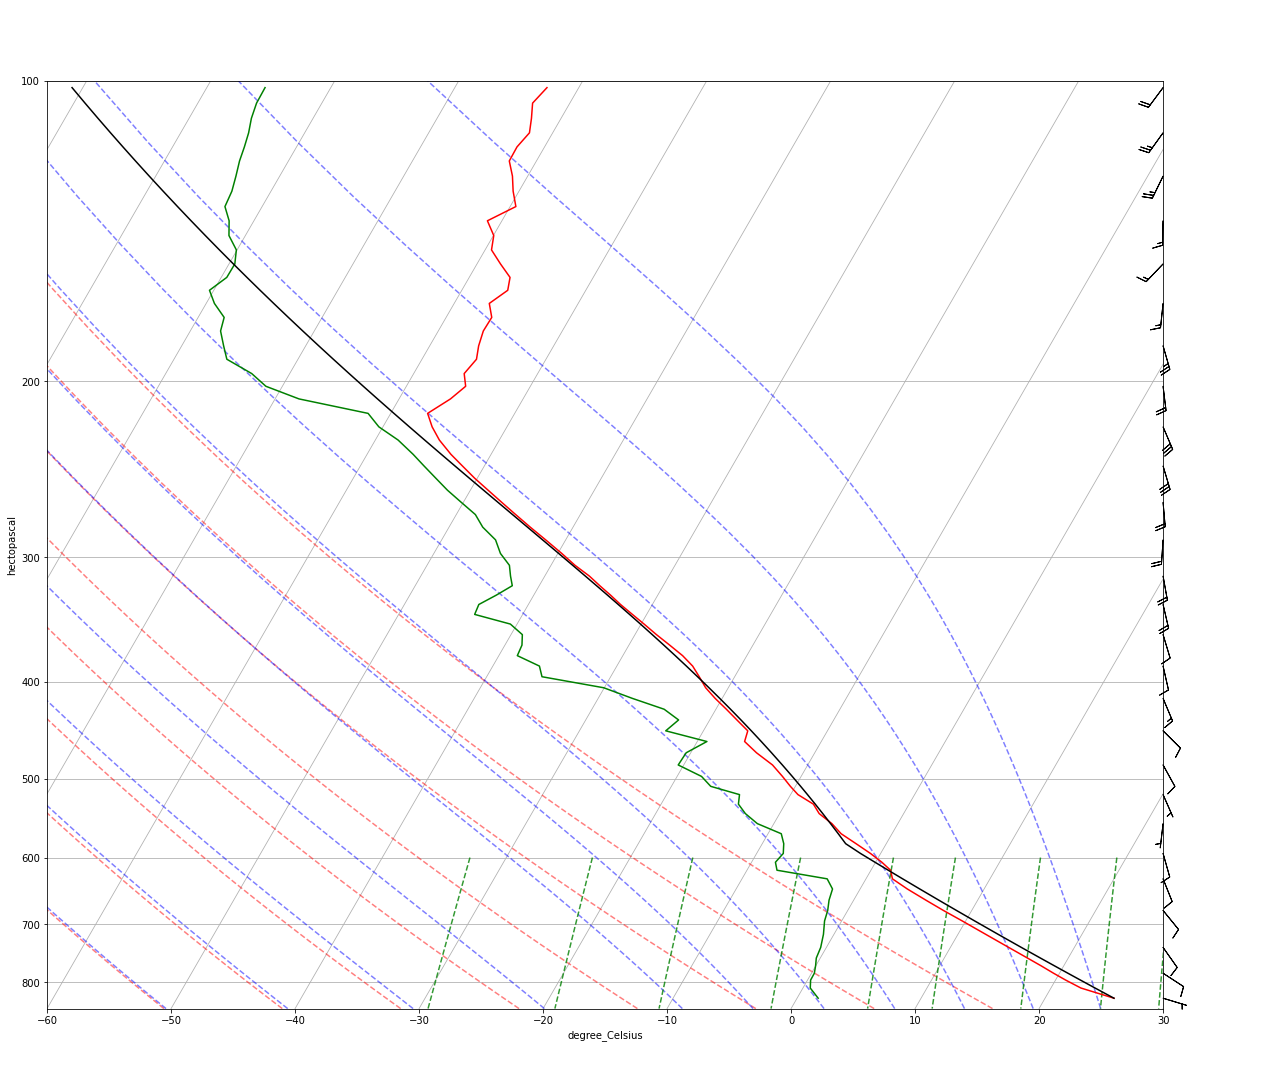

In [46]:
fig = plt.figure(figsize=(20, 20)) #setting figure size
skew = SkewT(fig)                #setting figure type. We will call to this below. 


#Calculate parcel profile
prof = mpcalc.parcel_profile(p, t[0], td[0]).to('degC')

#the above is making a lifted parcel profile to ease your analysis 
#it is initializing the parcel with the T and Td at the surface
#here t[0] means the first number in the t array. 
#recall that we arranged things to go from the surface (highest P) up
#the whole p array is in there since we want the parcel path at all levels



print("PROF = parcel temps")
print(prof)
print('   ')

#so now you see that prof is just an array of temps of the parcel. 
#Of course, you know this depends on the LCL and lapse rates it follows
#this is found by metpy since it knows the intial T and Td and the change in P
#as it goes up


#now we call to the skew function we set up at the top of this chunk of code


skew.plot(p, t, 'r')     #set environmental Ts to red
skew.plot(p, td, 'g')    #set environments Tds to green
skew.plot(p, prof, 'k')  #set parcel profile to black

#more colors ==> https://matplotlib.org/2.0.2/api/colors_api.html

skew.plot_barbs(p[::3], u[::3], v[::3])
#**I resampled this to every 3rd point to clean up the sounding**

#you can imagine that drawing up your own wind station models might be intense!!
#so we rely on the MetPy library to do it for us.
#here we are showing 'slicing' of the 1D arrays using the [::x] method
#As we have it [::1], we are using every number, but if you set p[::2],u[::2] etc. it 
#would use every other data point instead. And p[::-1] would reverse the array
#and use every point!

#try changing the slicing and see what happens when you run the cell. 
#since we only have 9 data points here, why not use all? But, our high rez sounding
#file has 3300 points so you wouldn't want that many wind barbs!!

skew.ax.set_xlim(-60, 30)
skew.ax.set_ylim(850, 100)

#simply setting axis limits. Try changing these and rerunning

# Add the relevant special lines
skew.plot_dry_adiabats()       #change color with (color='g') for example
skew.plot_moist_adiabats()
skew.plot_mixing_lines()


#skew.ax.fill_betweenx(p, t, prof, where=t>=prof, facecolor='blue', alpha=0.4)

#you can use above to fill stable areas blue (e.g. to see CINH in low levels)
#**note this is a winter sounding and is all stable
#in practice, one would limit this to below the LFC to see CINH explicitly

#skew.ax.fill_betweenx(p, t, prof, where=t<=prof, facecolor='red', alpha=0.4)

#you can use above to fill unstable areas red (e.g. to see CAPE above the LFC)
#there are no unstable areas on this sounding

plt.show()   #show the graph we have built

### Cool! Can you see the well mixed layer (i.e., the boundary layer) in the sounding?

###It is the area from 640-830mb where the environmental lapse rate is equal to the dry lapse rate (rising and falling air parcels SET the environmental lapse rate here. Also you can see that the mixing ratio is conserved during this mixing, since the dew point line parallels the mixing ratio lines. You may note the superadiabatic lapse rate at the very bottom. Indeed, clouds started to form just after students left at 230pm

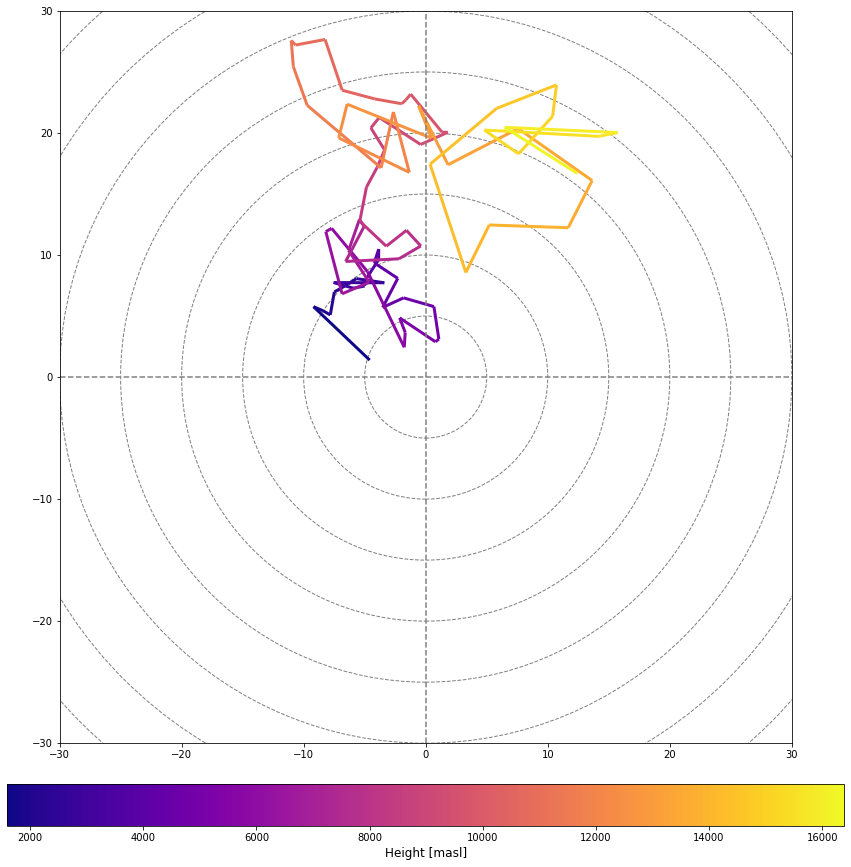

In [45]:
from metpy.plots import Hodograph
#importing metpy plotting pre-builts 


plt.rcParams["figure.figsize"] = (15,15)
h = Hodograph(component_range=30.)
h.add_grid(increment=5)

graph=h.plot_colormapped(u, v, hgt, cmap='plasma') # apply 3rd variable hgt
cbar=plt.colorbar(graph,orientation='horizontal', fraction=0.052, pad =.05)
cbar.set_label('Height [masl]', size='12')


# Show the plot
plt.show()